<a href="https://colab.research.google.com/github/pranay-pherwani/Betting-Simulations/blob/main/ProgressiveBetting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy import integrate
from mpl_toolkits import mplot3d
import random
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
!pip install pynverse
from pynverse import inversefunc
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib notebook

  Created wheel for pynverse: filename=pynverse-0.1.4.4-py3-none-any.whl size=6363 sha256=2dd96d883a28f4f29732f72032398e7b77fb5c8385b9f34033f1b3cd90ab8ee0
  Stored in directory: /root/.cache/pip/wheels/06/eb/74/006b76fdd8229ed3767fef546c825c2924f1def2d023929d9d
Successfully built pynverse


0.0006071163615208264


Text(0.5, 1.0, 'Probability of Going Bankrupt on a Specific Round')

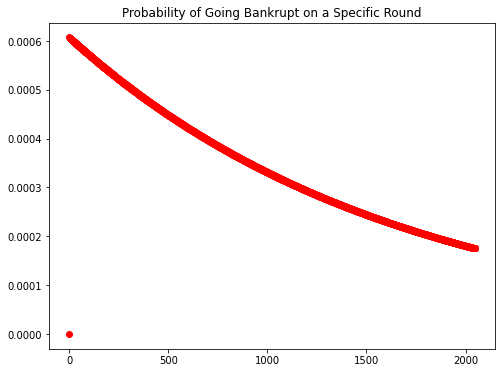

In [4]:
x0 = 1 # Amount you want to win
k = 2047 # Number of about amount in your bankroll
rounds = 2048
bankroll = x0*k 
losses_to_bankrupt = np.floor(np.log(k+1)/np.log(2))
win_rate = 0.49
bankrupt_prob_per_round = (1-win_rate)**losses_to_bankrupt
print(bankrupt_prob_per_round)
bankrupt_probability = [0]
for i in range(1,rounds):
  if np.floor(np.log(k+1)/np.log(2)) > losses_to_bankrupt:
    losses_to_bankrupt = losses_to_bankrupt+1
  # if i-1==2**losses_to_bankrupt: # Adjust for extra losses till bankrupt
  #   bankrupt_prob_per_round = bankrupt_prob_per_round*(1-win_rate)
  b = (1-bankrupt_prob_per_round)**(i-1)*bankrupt_prob_per_round
  bankrupt_probability.append(b)
  k = k+1

# x = np.arange(rounds)
# exponential = bankrupt_prob_per_round*np.exp(-x*bankrupt_prob_per_round)
indexes = np.arange(len(bankrupt_probability))
fig, dx = plt.subplots(figsize=(8,6), sharex=False)
plt.scatter(indexes,bankrupt_probability,color="red")
# plt.scatter(x,exponential,color="yellow")
plt.title("Probability of Going Bankrupt on a Specific Round")

In [ ]:
# sum = 0
# for i in range(len(bankrupt_probability)):
#   sum = sum + i*bankrupt_probability[i]
# print(sum)

Text(0.5, 1.0, 'Probability of Going Bankrupt after X Rounds')

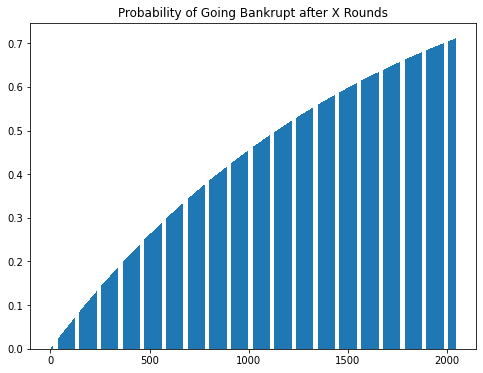

In [5]:
bp_cdf = [sum(bankrupt_probability[:y]) for y in range(1, len(bankrupt_probability) + 1)]
indexes = np.arange(len(bp_cdf))
fig, ex = plt.subplots(figsize=(8,6), sharex=False)
plt.bar(indexes,bp_cdf)
plt.title("Probability of Going Bankrupt after X Rounds")

In [6]:
print(bp_cdf[10])

0.001577988014414851


If you want to double your money (and thus withstand an extra loss) with a 49% win rate, the amount of rounds you would have to play would leave you with an extremely high (~70%) chance of going bankrupt. The probability is even higher if you wish to double an amount that is not approximately a power of 2.